In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
# Đọc dữ liệu
df = pd.read_csv('shopeep_koreantop_clothing_shop_data.csv')

# 5 dòng đầu
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

- Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm.
- Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.
- Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.
- Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 
- Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức. 
- Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

## Vẽ biểu đồ tần số số lượng shop gia nhập theo các năm

In [27]:
# Tính số lượng shop gia nhập theo năm
shops_per_year = df.groupby(df['join_year'])['shopid'].count()

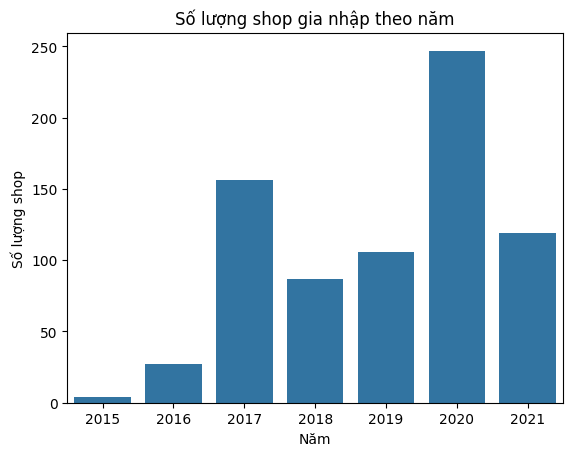

In [28]:
# Vẽ biểu đồ
sns.barplot(shops_per_year)
plt.title('Số lượng shop gia nhập theo năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng shop')

plt.show()

Nhìn chung số shop tham gia tăng dần

## Vẽ biểu đồ thể hiện mối quan hệ giữa tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt.

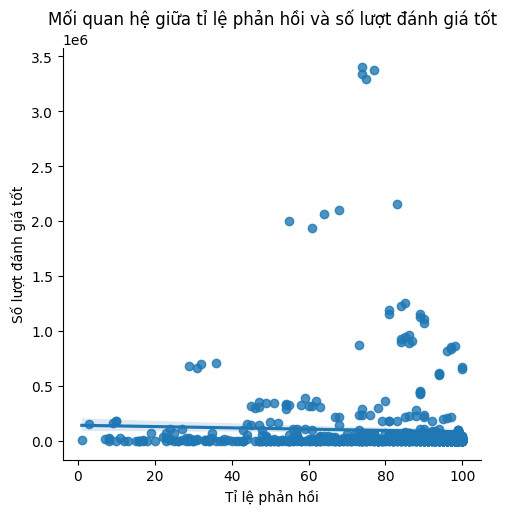

In [29]:
sns.lmplot(x = 'response_rate', y ='rating_good', data = df)
plt.title('Mối quan hệ giữa tỉ lệ phản hồi và số lượt đánh giá tốt')
plt.xlabel('Tỉ lệ phản hồi')
plt.ylabel('Số lượt đánh giá tốt')

plt.show()

Nhẫn xét:
- Tỉ lệ phản hồi cao không tỉ lệ thuận với số lượt đánh giá tốt nhưng có nhiều đánh giá tốt khi tỉ lệ phản hồi cao hơn

## Vẽ biểu đồ xu hướng thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

In [30]:
# Convert the 'response time' column to timedelta
df['response_time'] = pd.to_timedelta(df['response_time'])

# Extract total seconds and convert the datatype to integer
df['response_time_sec'] = df['response_time'].dt.total_seconds().astype(int)

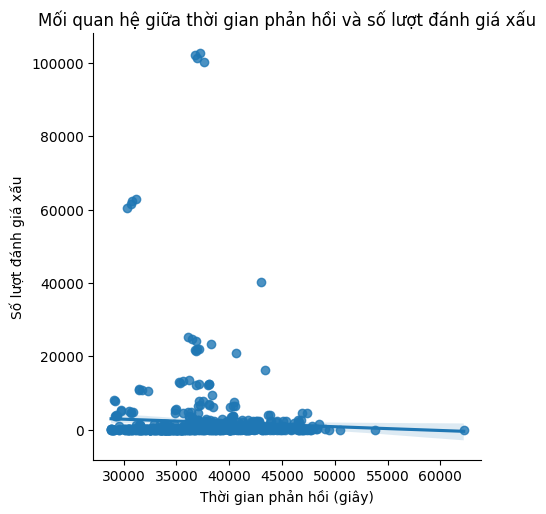

In [31]:
# Vẽ biểu đồ
sns.lmplot(x ='response_time_sec', y = 'rating_bad', data = df)
plt.title('Mối quan hệ giữa thời gian phản hồi và số lượt đánh giá xấu')
plt.xlabel('Thời gian phản hồi (giây)')
plt.ylabel('Số lượt đánh giá xấu')

plt.show()

Không có mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá xấu.

## Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình. 

<Axes: xlabel='rating_star', ylabel='Count'>

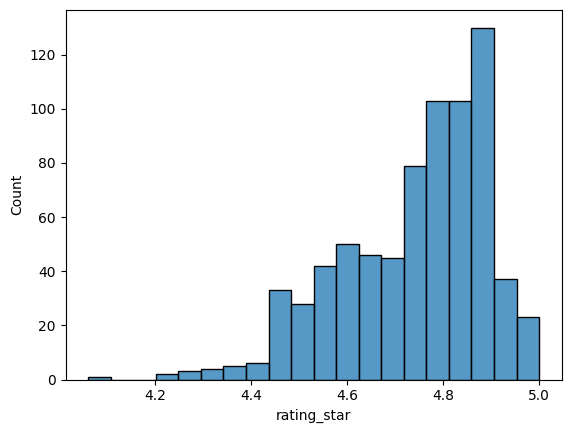

In [32]:
sns.histplot(df['rating_star'])

<Axes: ylabel='rating_star'>

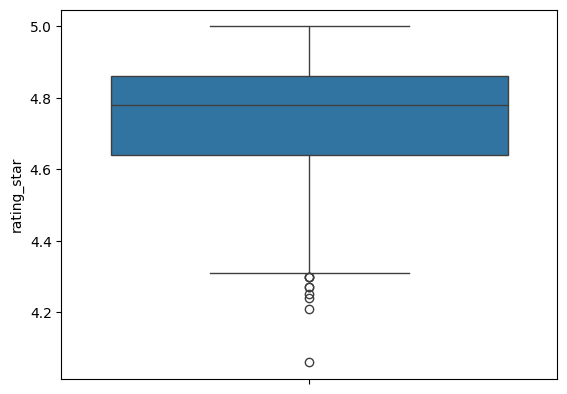

In [33]:
sns.boxplot(df['rating_star'])

## Vẽ biểu đồ tần số của cửa hàng chính thức và không chính thức. 

In [36]:
#  Thay 0 = 'not official', 1 = 'official' trong cột is_official_shop
df['is_official_shop'] = df['is_official_shop'].replace({0: 'not official', 1: 'official'})

<Axes: xlabel='is_official_shop', ylabel='count'>

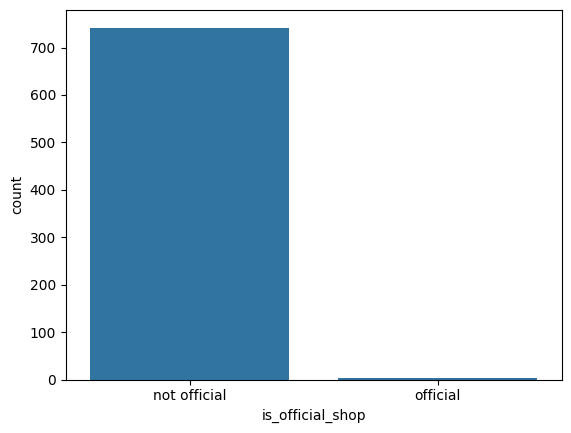

In [43]:
sns.countplot(x = df['is_official_shop'])

## Vẽ biểu đồ tần số của cửa hàng được xác thực với chưa xác thực. 

In [44]:
#  Thay 0 = 'not verified', 1 = 'verified' trong cột is_shopee_verified
df['is_shopee_verified'] = df['is_shopee_verified'].replace({0: 'not verified', 1: 'verified'})

<Axes: xlabel='is_shopee_verified', ylabel='count'>

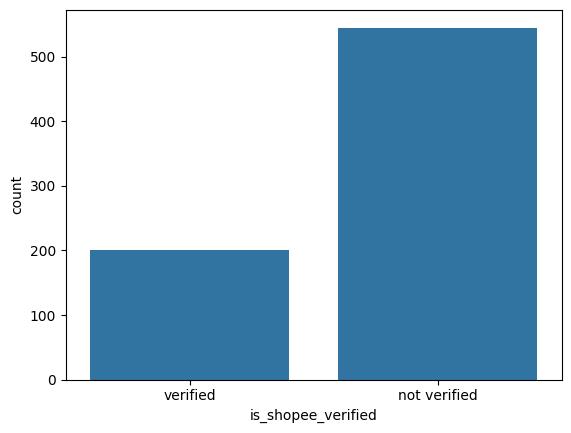

In [45]:
sns.countplot(x = df['is_shopee_verified'])